In [16]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [134]:
# Load the text file
file_path = '/Users/ql/Desktop/IS278 data/8_cleaned.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    raw_text = file.read()
print('loaded')

loaded


In [136]:
# Text Preprocessing
# Convert text to lowercase
text = raw_text.lower()

# Remove non-alphabetic characters and extra spaces
text = re.sub(r'[^a-z\s]', ' ', text)
text = re.sub(r'\s+', ' ', text)

# Simple tokenization using split
tokens = text.split()

# Define a manual list of common stopwords
common_stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", 
                     "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
                     "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", 
                     "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", 
                     "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", 
                     "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", 
                     "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
                     "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", 
                     "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", 
                     "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}

# Remove stopwords using the manually defined list
filtered_tokens = [word for word in tokens if word not in common_stop_words and len(word) > 2]

# Remove character names from the filtered tokens
character_names = {"ethan", "mia", "rose", "miranda", "chris", "heisenberg", "duke", "elena", "mother", "lucas", "jack", "lady", "dimitrescu"}
filtered_tokens_no_names = [word for word in filtered_tokens if word not in character_names]

# Prepare text for LDA
filtered_text_no_names = ' '.join(filtered_tokens_no_names)

# Use CountVectorizer to create a document-term matrix
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
dtm = vectorizer.fit_transform([filtered_text_no_names])
print('done')

done


In [138]:
# Fit LDA model using sklearn
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the topics and their top words
words = vectorizer.get_feature_names_out()
topics_summary_no_names = []
for idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics_summary_no_names.append(f"Topic {idx + 1}: " + ", ".join(top_words))
print('done')

done


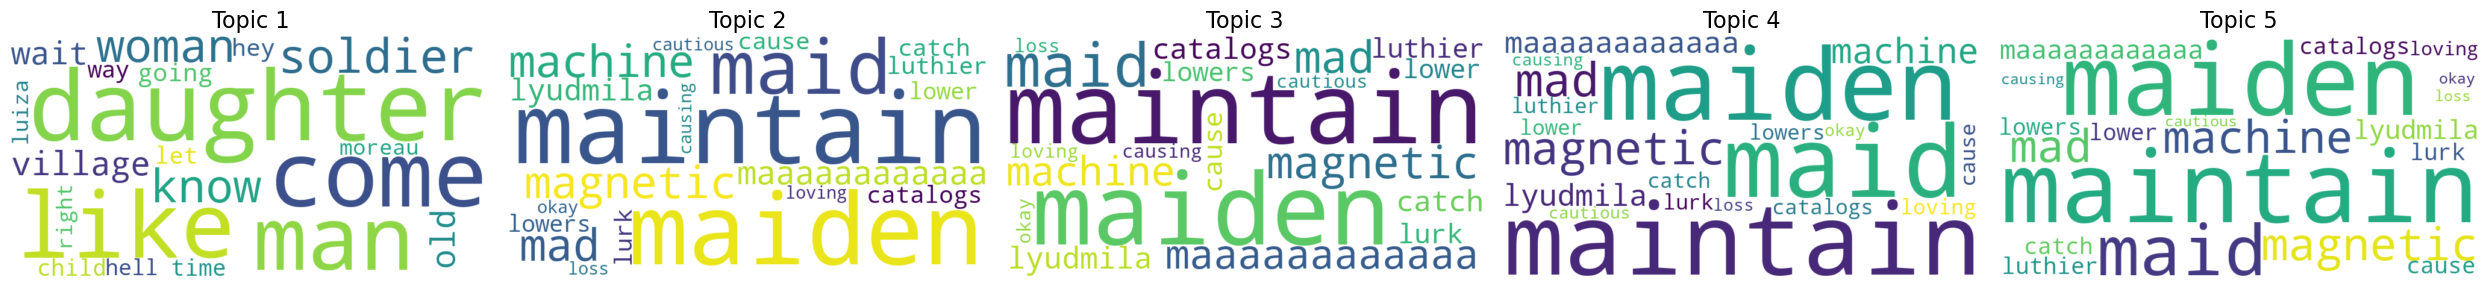

In [140]:
# Generate Word Cloud for each topic without character names
fig, axes = plt.subplots(1, num_topics, figsize=(25, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    topic_words = {words[j]: lda.components_[i][j] for j in lda.components_[i].argsort()[-20:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i+1}', fontsize=16)

plt.tight_layout()
plt.show()


In [142]:
for topic_summary in topics_summary_no_names:
    print(topic_summary)

Topic 1: going, village, old, woman, know, soldier, man, come, like, daughter
Topic 2: luthier, lurk, cause, lowers, lower, loving, causing, cautious, loss, okay
Topic 3: luthier, lurk, cause, lowers, lower, loving, causing, cautious, loss, okay
Topic 4: luthier, lurk, cause, lowers, lower, loving, causing, cautious, loss, okay
Topic 5: luthier, lurk, cause, lowers, lower, loving, causing, cautious, loss, okay
